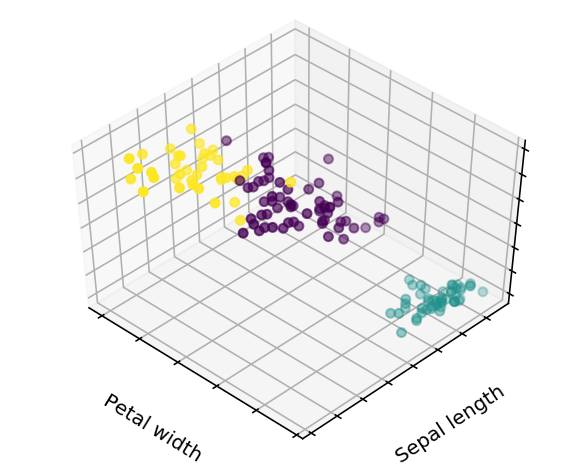

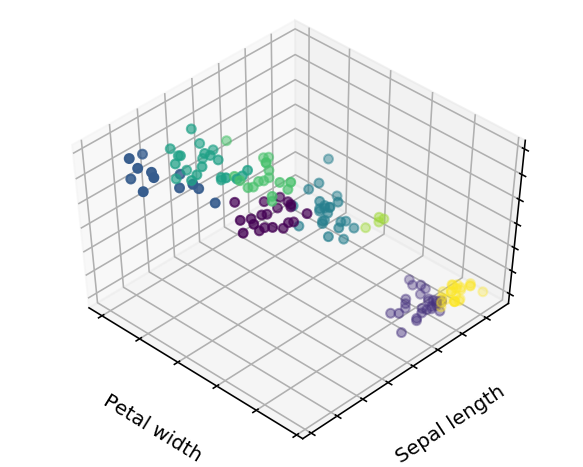

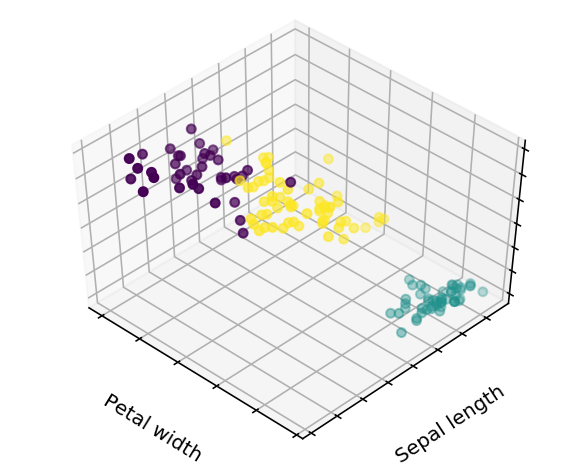

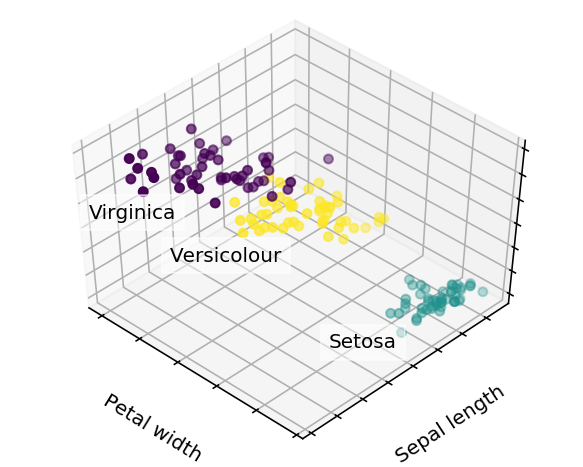

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()  
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  
    plt.cla()  
    est.fit(X)  
    labels = est.labels_  
  
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))  
  
    ax.w_xaxis.set_ticklabels([])  
    ax.w_yaxis.set_ticklabels([])  
    ax.w_zaxis.set_ticklabels([])  
    ax.set_xlabel('Petal width')  
    ax.set_ylabel('Sepal length')  
    ax.set_zlabel('Petal length')  
    fignum = fignum + 1  
  
# Plot the ground truth  
fig = plt.figure(fignum, figsize=(4, 3))  
plt.clf()  
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)  
  
plt.cla()  
  
for name, label in [('Setosa', 0),  
                   ('Versicolour', 1),  
                    ('Virginica', 2)]:  
    ax.text3D(X[y == label, 3].mean(),  
              X[y == label, 0].mean() + 1.5,  
              X[y == label, 2].mean(), name,  
              horizontalalignment='center',  
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))  
# Reorder the labels to have colors matching the cluster results  
y = np.choose(y, [1, 2, 0]).astype(np.float)  
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)  
  
ax.w_xaxis.set_ticklabels([])  
ax.w_yaxis.set_ticklabels([])  
ax.w_zaxis.set_ticklabels([])  
ax.set_xlabel('Petal width')  
ax.set_ylabel('Sepal length')  
ax.set_zlabel('Petal length')  
plt.show()